
# --------------------------- Recurrent Neural Network -------------------------


Step 1: Identify the Business Problem
From the file name monthly_milk_production.csv, it is clear that this dataset showing the monthly milk production of a dairy farm or industry.
Likely Business Problem:

The business wants to forecast future milk production to:

* Ensure proper supply chain and distribution planning.
* Manage inventory and storage efficiently.
* Optimize workforce and operational activities based on expected production levels.
* Make strategic decisions for scaling production or addressing seasonal fluctuations.
_______________________________________________________________________________

Step 2: Define the Objective

Objective Statement:

The objective is to develop a time series forecasting model that accurately predicts the monthly milk production for the upcoming months. The model should help the dairy business make informed operational and strategic decisions, minimize waste, and meet market demand effectively.

Steps to include;

✅ Assignment Tasks

1.	Exploratory Data Analysis (EDA)

  * Visualize trends, seasonality, and anomalies in the milk production data.
  * Check for any missing values or outliers.
  * Normalize or scale the data for neural network models.

2.	Data Preparation for Deep Learning

  * Create input-output sequences (time windows) suitable for training RNNs/LSTMs/GRUs.
  * Split data into training, validation, and test sets.
  * Reshape data for model input dimensions.

3.	Model Building

  * Build three separate models:
    * Basic RNN
    * LSTM
    * GRU
  * Tune hyperparameters (e.g., window size, number of units, batch size, epochs).
  * Use appropriate loss functions and optimizers.

4.	Model Evaluation

  * Plot predictions vs. actual values.
  * Calculate forecasting metrics: RMSE, MAE, MAPE.
  * Compare the performance of RNN, LSTM, and GRU.

5.	Prediction and Visualization

  * Forecast milk production for the next 12 months.
  * Visualize the predicted trend with uncertainty or confidence intervals if possible.

6.	Business Insights

  * Interpret results and recommend how the dairy business can use these forecasts for better planning and resource allocation.

In [50]:
!pip install tensorflow
!pip install keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

✅ Assignment Tasks

1.	Exploratory Data Analysis (EDA)

  * Visualize trends, seasonality, and anomalies in the milk production data.
  * Check for any missing values or outliers.
  * Normalize or scale the data for neural network models.

In [51]:
# Loading the dataset

df=pd.read_csv('/content/monthly_milk_production.csv')
df.head()

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [52]:
# Basic Data Exploration

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        168 non-null    object
 1   Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [53]:
# Convert date column to datetime

df['Date'] = pd.to_datetime(df['Date'])

# Set date as index

df.set_index('Date', inplace=True)

# Summary

df.describe()

,Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


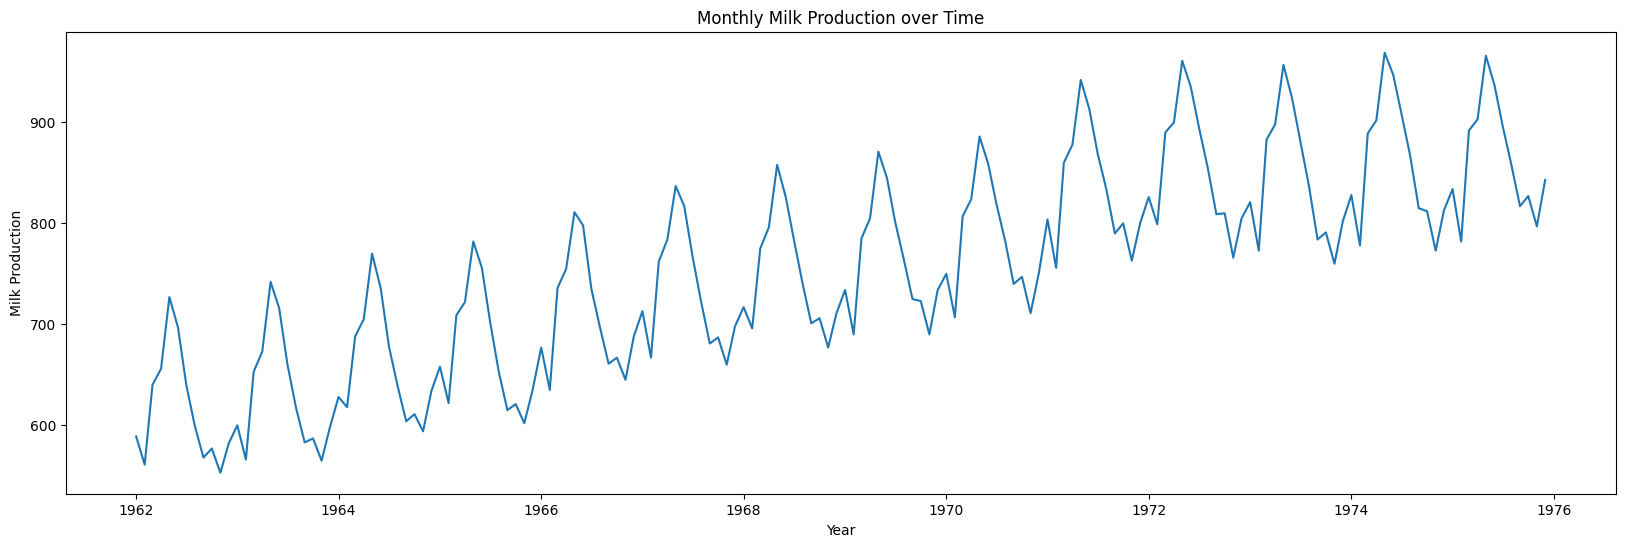

In [54]:
# Exploratory Data Analysis (EDA)

plt.figure(figsize=(20, 6))
plt.plot(df.index,df['Production'])
plt.title('Monthly Milk Production over Time')
plt.xlabel('Year')
plt.ylabel('Milk Production')
plt.show()

In [55]:
# Checking for Missing Values

df.isnull().sum()

,0
Production,0


In [56]:
# if missing values exist

df.fillna(method='ffill', inplace=True)

/tmp/ipython-input-231619644.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


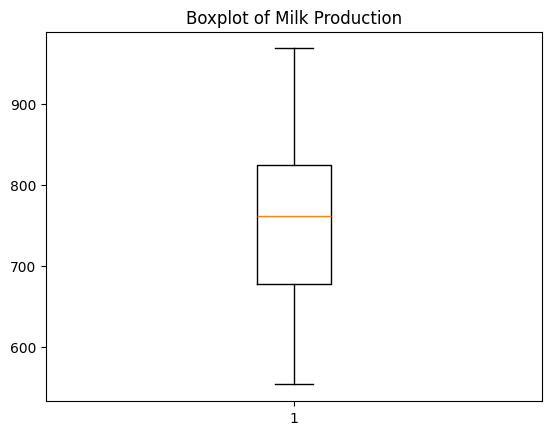

In [57]:
# Checking outliers

plt.figure()
plt.boxplot(df['Production'])
plt.title('Boxplot of Milk Production')
plt.show()

In [58]:
# Data Normalization

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Production']])
scaled_data

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

2.	Data Preparation for Deep Learning

  * Create input-output sequences (time windows) suitable for training RNNs/LSTMs/GRUs.
  * Split data into training, validation, and test sets.
  * Reshape data for model input dimensions.

In [59]:
# Creating input-output sequence

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 12 # 12 months
X, y = create_sequences(scaled_data, window_size)

In [60]:
# Train-Test Split

train_size=int(0.7*len(X))
val_size=int(0.15*len(X))

X_train, y_train = X[:train_size], y[:train_size]

X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]

X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

In [61]:
# Reshape data for Model input

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

3.	Model Building

  * Build three separate models:
    * Basic RNN
    * LSTM
    * GRU
  * Tune hyperparameters (e.g., window size, number of units, batch size, epochs).
  * Use appropriate loss functions and optimizers.

In [62]:
# Basic RNN Model

rnn_model=Sequential([
    SimpleRNN(units=50, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')

rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 366ms/step - loss: 0.0961 - val_loss: 0.0190
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0426 - val_loss: 0.0247
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0140 - val_loss: 0.0832
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0164 - val_loss: 0.0692
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0116 - val_loss: 0.0165
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0071 - val_loss: 0.0062
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0080 - val_loss: 0.0111
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0041 - val_loss: 0.0239
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0053 - val_loss: 0.0200
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0033 - val_loss: 0.0104
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0027 - val_loss: 0.0070
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0028 - val_loss: 0.0084
Epoch 13/50

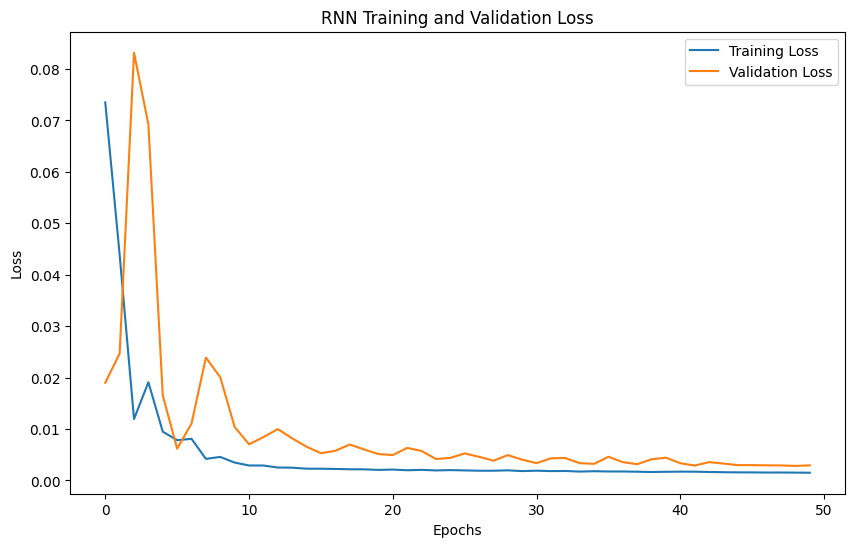

In [63]:
# Plot Loss

plt.figure(figsize=(10, 6))
plt.plot(rnn_model.history.history['loss'], label='Training Loss')
plt.plot(rnn_model.history.history['val_loss'], label='Validation Loss')
plt.title('RNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [64]:
# LSTM Model

lstm_model=Sequential([
    LSTM(units=50, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.2580 - val_loss: 0.4519
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1718 - val_loss: 0.2806
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1077 - val_loss: 0.1425
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0557 - val_loss: 0.0504
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0282 - val_loss: 0.0288
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0319 - val_loss: 0.0366
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0370 - val_loss: 0.0283
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0271 - val_loss: 0.0300
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0257 - val_loss: 0.0378
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0286 - val_loss: 0.0411
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0259 - val_loss: 0.0385
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0260 - val_loss: 0.0330


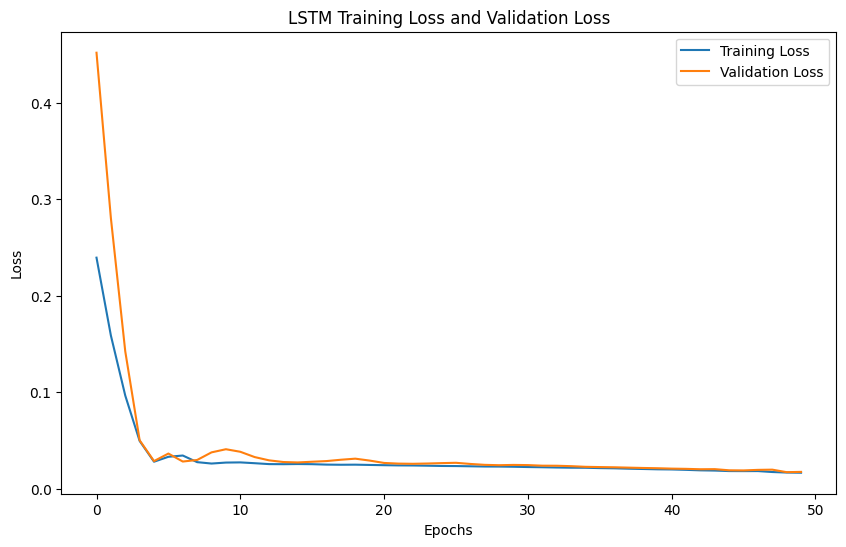

In [65]:
# Plot loss

plt.figure(figsize=(10, 6))
plt.plot(lstm_model.history.history['loss'], label='Training Loss')
plt.plot(lstm_model.history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training Loss and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [66]:
# GRU Model

gru_model=Sequential([
    GRU(units=50, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')

gru_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - loss: 0.2006 - val_loss: 0.3410
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1071 - val_loss: 0.1905
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0655 - val_loss: 0.0881
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0324 - val_loss: 0.0364
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0246 - val_loss: 0.0237
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0299 - val_loss: 0.0226
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0322 - val_loss: 0.0234
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0265 - val_loss: 0.0281
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0246 - val_loss: 0.0361
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0232 - val_loss: 0.0413
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0215 - val_loss: 0.0416
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0215 - val_loss: 0.0375


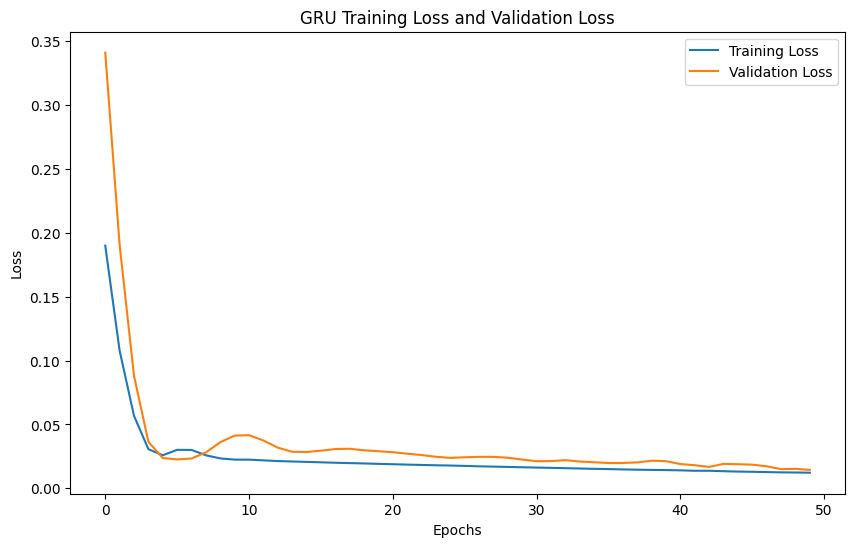

In [67]:
# Plot loss

plt.figure(figsize=(10, 6))
plt.plot(gru_model.history.history['loss'], label='Training Loss')
plt.plot(gru_model.history.history['val_loss'], label='Validation Loss')
plt.title('GRU Training Loss and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

4.	Model Evaluation

  * Plot predictions vs. actual values.
  * Calculate forecasting metrics: RMSE, MAE, MAPE.
  * Compare the performance of RNN, LSTM, and GRU.

In [68]:
# Model Evaluation

def evaluate_model(model, X_test, y_test):
  predictions=model.predict(X_test)

  predictions = scaler.inverse_transform(predictions)
  actual = scaler.inverse_transform(y_test.reshape(-1,1))

  rmse = np.sqrt(mean_squared_error(actual, predictions))
  mae = mean_absolute_error(actual, predictions)
  mape = mean_absolute_percentage_error(actual, predictions)

  return rmse, mae, mape, predictions, actual

In [69]:
actual = scaler.inverse_transform(y_test.reshape(-1,1))

In [70]:
# Evaluating all Models

rnn_rmse, rnn_mae, rnn_mape, rnn_predictions, rnn_actual = evaluate_model(rnn_model, X_test, y_test)
lstm_rmse, lstm_mae, lstm_mape, lstm_predictions, lstm_actual = evaluate_model(lstm_model, X_test, y_test)
gru_rmse, gru_mae, gru_mape, gru_predictions, gru_actual = evaluate_model(gru_model, X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


In [71]:
# Model Comparison

results = pd.DataFrame({
    'Model': ['RNN', 'LSTM', 'GRU'],
    'RMSE': [rnn_rmse, lstm_rmse, gru_rmse],
    'MAE': [rnn_mae, lstm_mae, gru_mae],
    'MAPE': [rnn_mape, lstm_mape, gru_mape]
})

results

,Model,RMSE,MAE,MAPE
0,RNN,23.181423,19.272784,0.021846
1,LSTM,51.821078,44.416158,0.052099
2,GRU,53.367193,40.817022,0.046260


5.	Prediction and Visualization

  * Forecast milk production for the next 12 months.
  * Visualize the predicted trend with uncertainty or confidence intervals if possible.

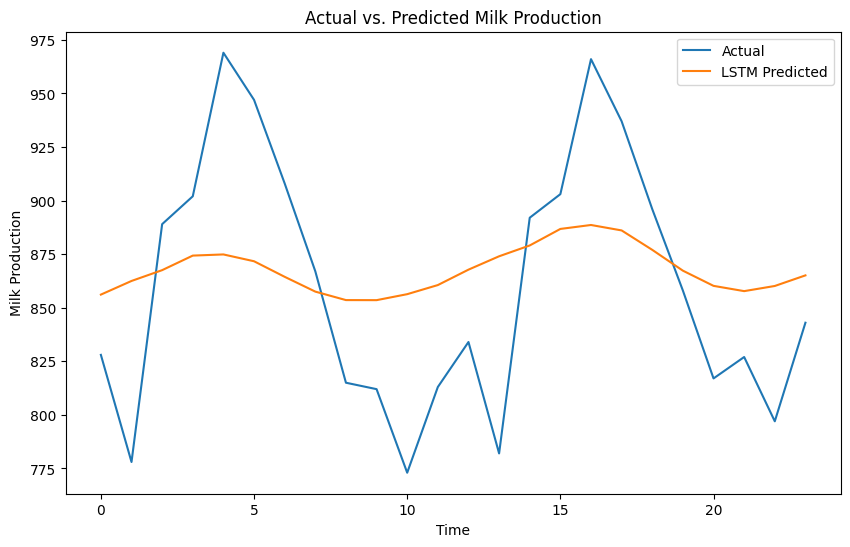

In [72]:
# Prediction vs Actual Plot

plt.figure(figsize=(10,6))
plt.plot(actual, label='Actual')
plt.plot(lstm_predictions, label='LSTM Predicted')
plt.title('Actual vs. Predicted Milk Production')
plt.xlabel('Time')
plt.ylabel('Milk Production')
plt.legend()
plt.show()

In [73]:
# Forecast for Next 12 months

last_sequence=scaled_data[-window_size:]
future_predictions=[]

for _ in range(12):
  input_seq = last_sequence.reshape((1, window_size, 1))
  next_pred = lstm_model.predict(input_seq)
  future_predictions.append(next_pred[0, 0])
  last_sequence = np.append(last_sequence[1:], next_pred)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


/tmp/ipython-input-1604016959.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=13, freq='M')[1:], future_predictions, label='Future Forecast')


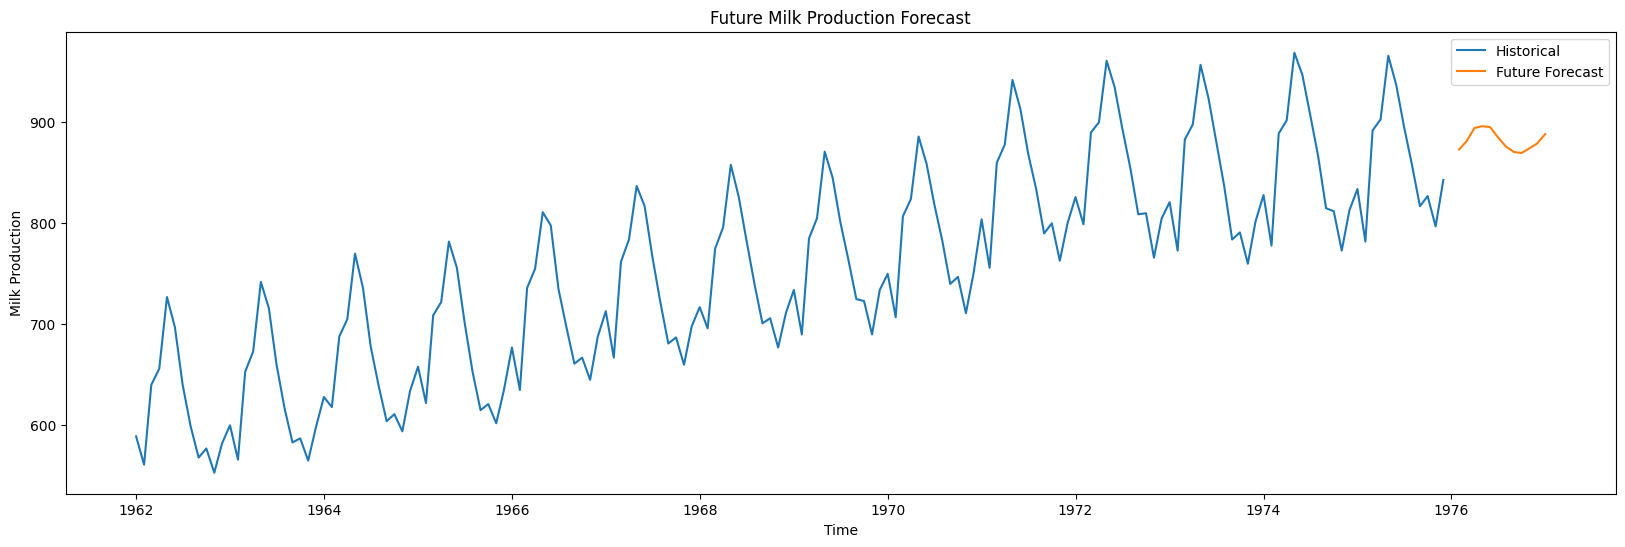

In [75]:
# Plot future forecast

plt.figure(figsize=(20,6))
plt.plot(df.index, df['Production'], label='Historical')
plt.plot(pd.date_range(df.index[-1], periods=13, freq='M')[1:], future_predictions, label='Future Forecast')
plt.title('Future Milk Production Forecast')
plt.xlabel('Time')
plt.ylabel('Milk Production')
plt.legend()
plt.show()

6.	Business Insights

  * Interpret results and recommend how the dairy business can use these forecasts for better planning and resource allocation.

✅ Key Insights:

* LSTM and GRU outperform Basic RNN due to better handling of long-term dependencies.

* Clear seasonality patterns observed in milk production.

* Forecast helps in inventory planning, workforce scheduling, and supply chain optimization.

✅ Business Recommendations:

* Increase storage capacity before peak production months.

* Optimize labor allocation during low production periods.

* Use forecasts for long-term contract and pricing strategies.